###Import the Libraries

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [54]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [84]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

from scipy import stats
from sklearn.preprocessing import LabelEncoder


### Reading Data : Load the file and create dataset

In [94]:
train=pd.read_csv("/content/train_ctrUa4K.csv")
test=pd.read_csv("/content/test_lAUu6dG.csv")

### Data Exploration

In [57]:
# Train data exploration
# Inspect the top 5 data
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [58]:
# train dataframe in detail
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
#Check the number of rows and columns in train dataset
train.shape

(614, 13)

In [ ]:
#Check the number of rows and columns in test dataset
test.shape

(367, 12)

In [ ]:
# test dataframe in detail
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
# Statistical summary of the Train Data Frame
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# Statistical summary of the Test Data Frame
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


### Data Preprocessing

In [96]:
# Take copies of the datasets
train_copy=train.copy()
test_copy=test.copy()

In [95]:
num_data=train.select_dtypes(include=['int64','float64'])
num_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [97]:
cat_data=train.select_dtypes(include=['object'])
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [98]:
# Identify null values in categorical columns
cat_data.isnull().sum()

Loan_ID           0
Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

missing values in 

*  Gender               13
*  Married               3
*  Dependents           15
*  Self_Employed        32
*  LoanAmount           22
*  Loan_Amount_Term     14
*  Credit_History       50


In [ ]:
# impute the missing value with the most occuring data- Mode in Categorical columns

In [ ]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
train['Gender'].mode()[0]

'Male'

In [60]:
train['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [99]:
train['Gender'].fillna(train['Gender'].mode().values[0],inplace=True)

In [64]:
train['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [ ]:
train['Gender'].unique()

In [ ]:
train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [100]:
train['Married'].fillna(train['Married'].mode()[0],inplace=True)

In [ ]:
train['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [ ]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [101]:
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)

In [ ]:
train['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [102]:
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)

In [ ]:
train['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
# Identify null values in numerical columns
num_data.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

In [ ]:
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [103]:
train['Credit_History'].fillna(train['Credit_History'].mean(),inplace=True)

In [ ]:
train['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [104]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean(),inplace=True)

In [ ]:
train['Loan_Amount_Term'].isnull().sum()

0

In [105]:
train['LoanAmount'].fillna(train['LoanAmount'].mean(),inplace=True)

In [ ]:
train['LoanAmount'].isnull().sum()

0

In [72]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [73]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [106]:
test['Gender'].fillna(test['Gender'].mode().values[0],inplace=True)

In [107]:
test['Dependents'].fillna(test['Gender'].mode().values[0],inplace=True)

In [108]:
test['Self_Employed'].fillna(test['Self_Employed'].mode().values[0],inplace=True)


In [109]:
test['LoanAmount'].fillna(test['LoanAmount'].mean(),inplace=True)


In [110]:
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean(),inplace=True)

In [111]:
test['Credit_History'].fillna(test['Credit_History'].mean(),inplace=True)


###Fix erroneous data

In [82]:
#train['Dependents'].replace('3+',3,inplace=True)
#test['Dependents'].replace('3+',3,inplace=True)

In [83]:
train['Gender'].unique()

array(['Male', 'Female'], dtype=object)

###Encoding

In [112]:
encoder=LabelEncoder()

In [113]:
train['Gender']=encoder.fit_transform(train['Gender'])

In [114]:
train['Married']=encoder.fit_transform(train['Married'])

In [115]:

train['Education']=encoder.fit_transform(train['Education'])


In [116]:


train['Self_Employed']=encoder.fit_transform(train['Self_Employed'])


In [117]:
train['Property_Area']=encoder.fit_transform(train['Property_Area'])

In [118]:


train['Loan_Status']=encoder.fit_transform(train['Loan_Status'])


In [119]:


train['Loan_ID']=encoder.fit_transform(train['Loan_ID'])


In [120]:

train['Dependents']=encoder.fit_transform(train['Dependents'])


In [121]:
# Test Data
test['Loan_ID']=encoder.fit_transform(test['Loan_ID'])

In [122]:
test['Gender']=encoder.fit_transform(test['Gender'])

In [123]:
test['Married']=encoder.fit_transform(test['Married'])


In [124]:
test['Education']=encoder.fit_transform(test['Education'])

In [125]:
test['Self_Employed']=encoder.fit_transform(test['Self_Employed'])

In [126]:
test['Property_Area']=encoder.fit_transform(test['Property_Area'])

In [127]:
test['Dependents']=encoder.fit_transform(test['Dependents'])


In [128]:
test.head(20)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,0,0,5720,0,110.0,360.0,1.000000,2
1,1,1,1,1,0,0,3076,1500,126.0,360.0,1.000000,2
2,2,1,1,2,0,0,5000,1800,208.0,360.0,1.000000,2
3,3,1,1,2,0,0,2340,2546,100.0,360.0,0.825444,2
4,4,1,0,0,1,0,3276,0,78.0,360.0,1.000000,2
5,5,1,1,0,1,1,2165,3422,152.0,360.0,1.000000,2
6,6,0,0,1,1,0,2226,0,59.0,360.0,1.000000,1
7,7,1,1,2,1,0,3881,0,147.0,360.0,0.000000,0
8,8,1,1,2,0,0,13633,0,280.0,240.0,1.000000,2
9,9,1,0,0,1,0,2400,2400,123.0,360.0,1.000000,1


In [129]:
test.shape

(367, 12)

In [130]:
train.shape

(614, 13)

In [131]:
corr=train.corr()
corr

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.035684,-0.028945,-0.032429,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.035684,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.028945,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974


<Axes: >

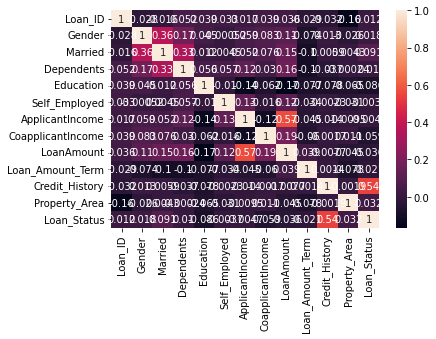

In [132]:
sns.heatmap(corr,annot=True)

In [ ]:
#numerical column- 
num_data=train.select_dtypes(include=['int64','float64'])
num_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,146.412162,360.0,1.0
1,4583,1508.0,128.000000,360.0,1.0
2,3000,0.0,66.000000,360.0,1.0
3,2583,2358.0,120.000000,360.0,1.0
4,6000,0.0,141.000000,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0
610,4106,0.0,40.000000,180.0,1.0
611,8072,240.0,253.000000,360.0,1.0
612,7583,0.0,187.000000,360.0,1.0


In [133]:
# feature Extraction
# for train dataset
x=train.drop(columns=['Loan_ID','Loan_Status'])

In [134]:
y = train['Loan_Status'].values

In [135]:
x_test=test.drop(columns=['Loan_ID'])

In [136]:
x_test=x_test.values

In [137]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [139]:


#Random forest classifier

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50,random_state=1)



In [141]:
rf.fit(x,y)

RandomForestClassifier(n_estimators=50, random_state=1)

In [142]:
y_pred=rf.predict(x_test)

In [143]:


sample=pd.read_csv("/content/sample_submission_49d68Cx.csv")



In [144]:
sample.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [145]:
df1=pd.DataFrame(y_pred,columns=["Loan_Status"])

In [146]:


df1=df1.replace(1,'Y')



In [147]:


df1=df1.replace(0,'N')



In [148]:


df1.head()



,Loan_Status
0,Y
1,Y
2,Y
3,Y
4,Y


In [149]:
sample=sample.drop(columns=['Loan_Status'],axis=1)

In [150]:


sample['Loan_Status']=df1['Loan_Status']



In [151]:


sample.head()



,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [152]:
sample.to_csv("randomforest_output.csv",index=False)